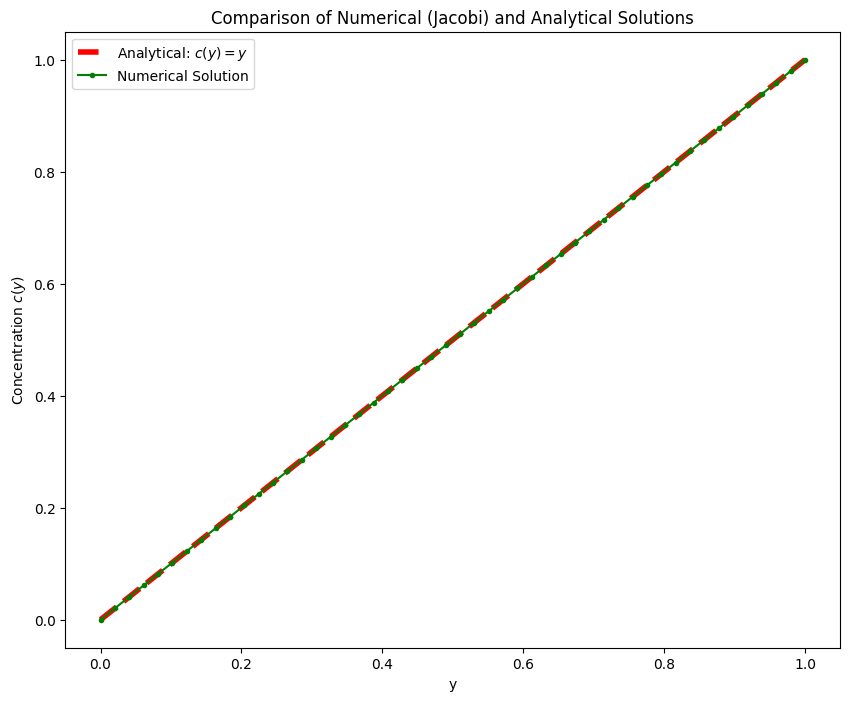

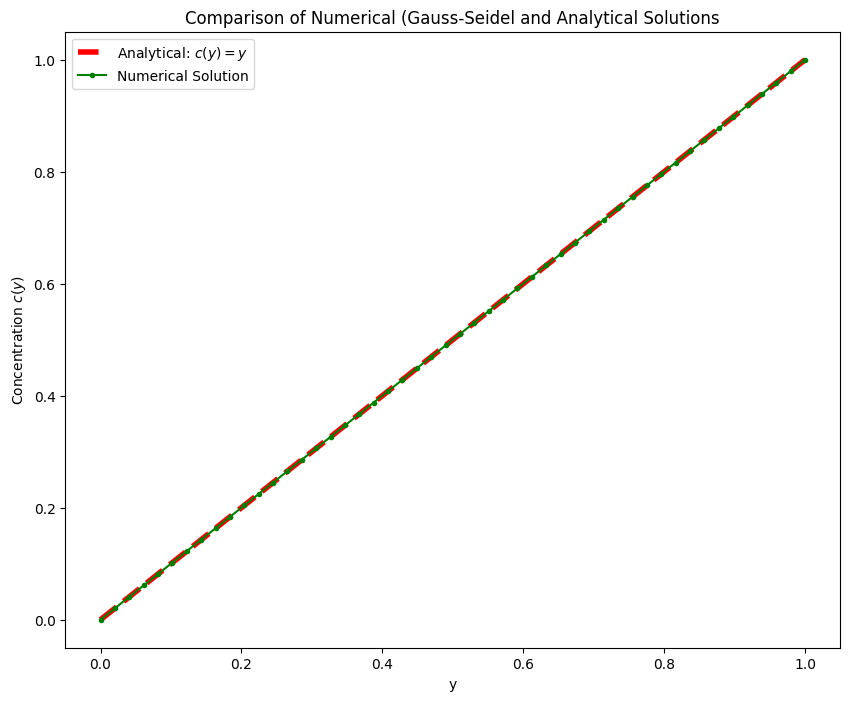

In [35]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from src.funs_1_6_jacobi import jacobi_iteration
from src.funs_1_6_gauss import gauss_seidel_iteration

# grid with boundary conditions c(y) = y
Ny = 50  # N grid points along y
Nx = 50  # N grid points along x
grid = np.zeros((Ny, Nx))

# boundary condition
for i in range(Ny):
    grid[i, :] = i / (Ny - 1)  # Normalize 

numerical_solution_j = jacobi_iteration(grid, 50)
numerical_solution_g = gauss_seidel_iteration(grid, 50)

y_values = np.linspace(0, 1, Ny)
numerical_profile_j = numerical_solution_j[:, Nx//2]  # for comparison (middle column)
numerical_profile_g = numerical_solution_g[:, Nx//2]
analytical_profile = y_values  # Since c(y) = y analytically

plt.figure(figsize=(10, 8))
plt.plot(y_values, analytical_profile, label="Analytical: $c(y) = y$", linestyle="--", color="red", lw=4)
plt.plot(y_values, numerical_profile_j, label="Numerical Solution", marker="o", markersize=3, linestyle="-", color="green")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical (Jacobi) and Analytical Solutions")
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, f'1_6_jacobi_comparison_plot.png')
plt.savefig(save_path, dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(y_values, analytical_profile, label="Analytical: $c(y) = y$", linestyle="--", color="red", lw=4)
plt.plot(y_values, numerical_profile_g, label="Numerical Solution", marker="o", markersize=3, linestyle="-", color="green")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical (Gauss-Seidel and Analytical Solutions")
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, f'1_6_gauss_seidel_comparison_plot.png')
plt.savefig(save_path, dpi=300)
plt.show()

